In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/telco-customer-churn


In [ ]:
df = pd.read_csv(path + "/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
duplicate_customer_ids = df['customerID'].duplicated().sum()
print(f"Number of duplicate customer IDs: {duplicate_customer_ids}")

Number of duplicate customer IDs: 0


In [ ]:
df.drop("customerID", axis=1, inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(22)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


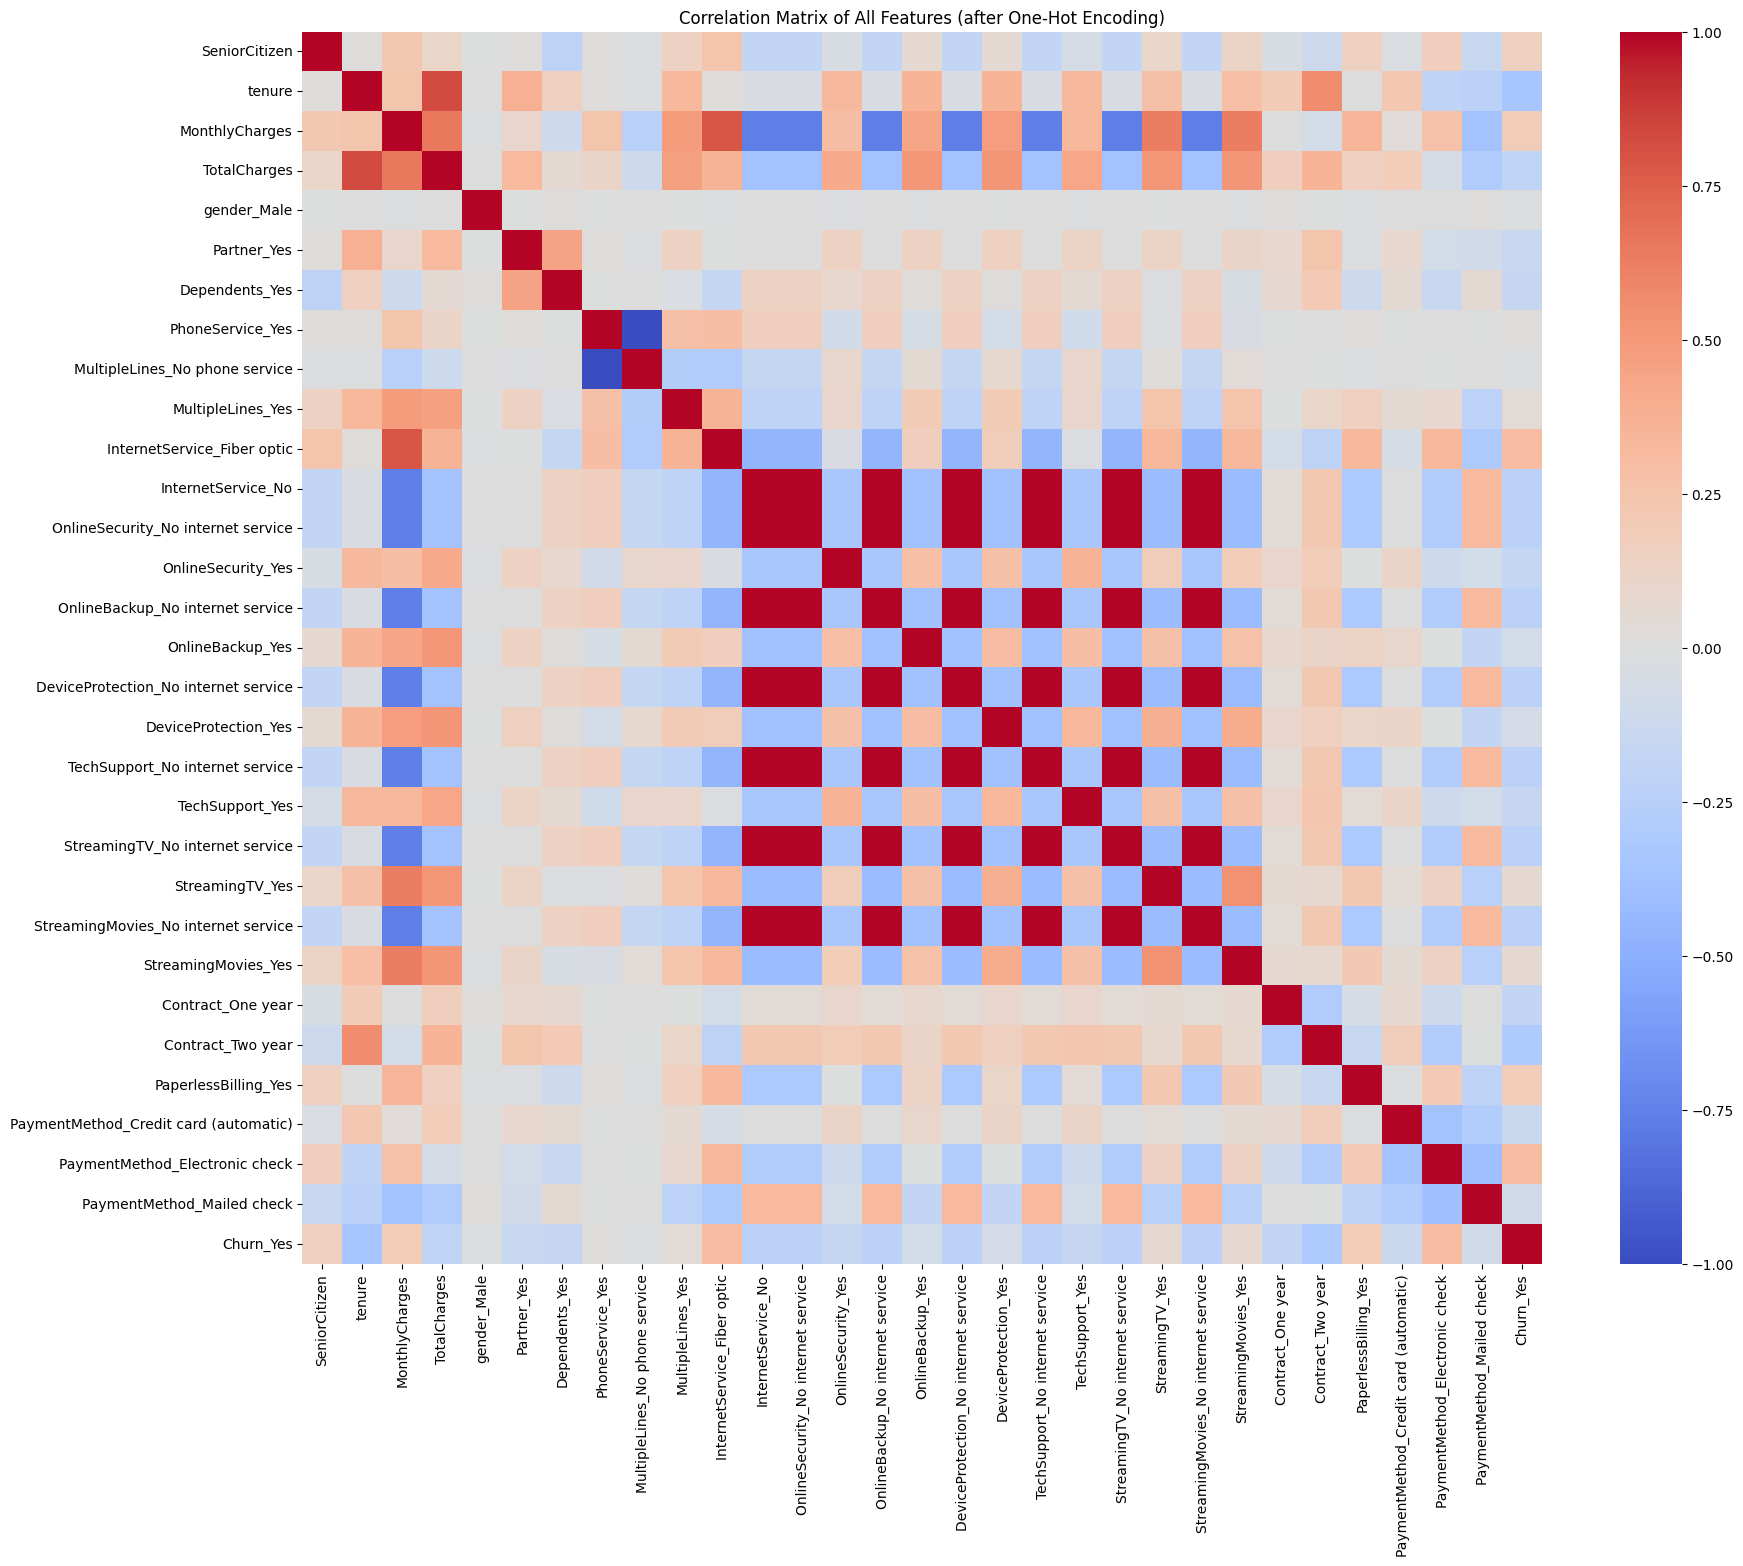

In [ ]:
# Plot the correlation heatmap using the previously calculated correlation matrix
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix_encoded, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of All Features (after One-Hot Encoding)')
plt.show()

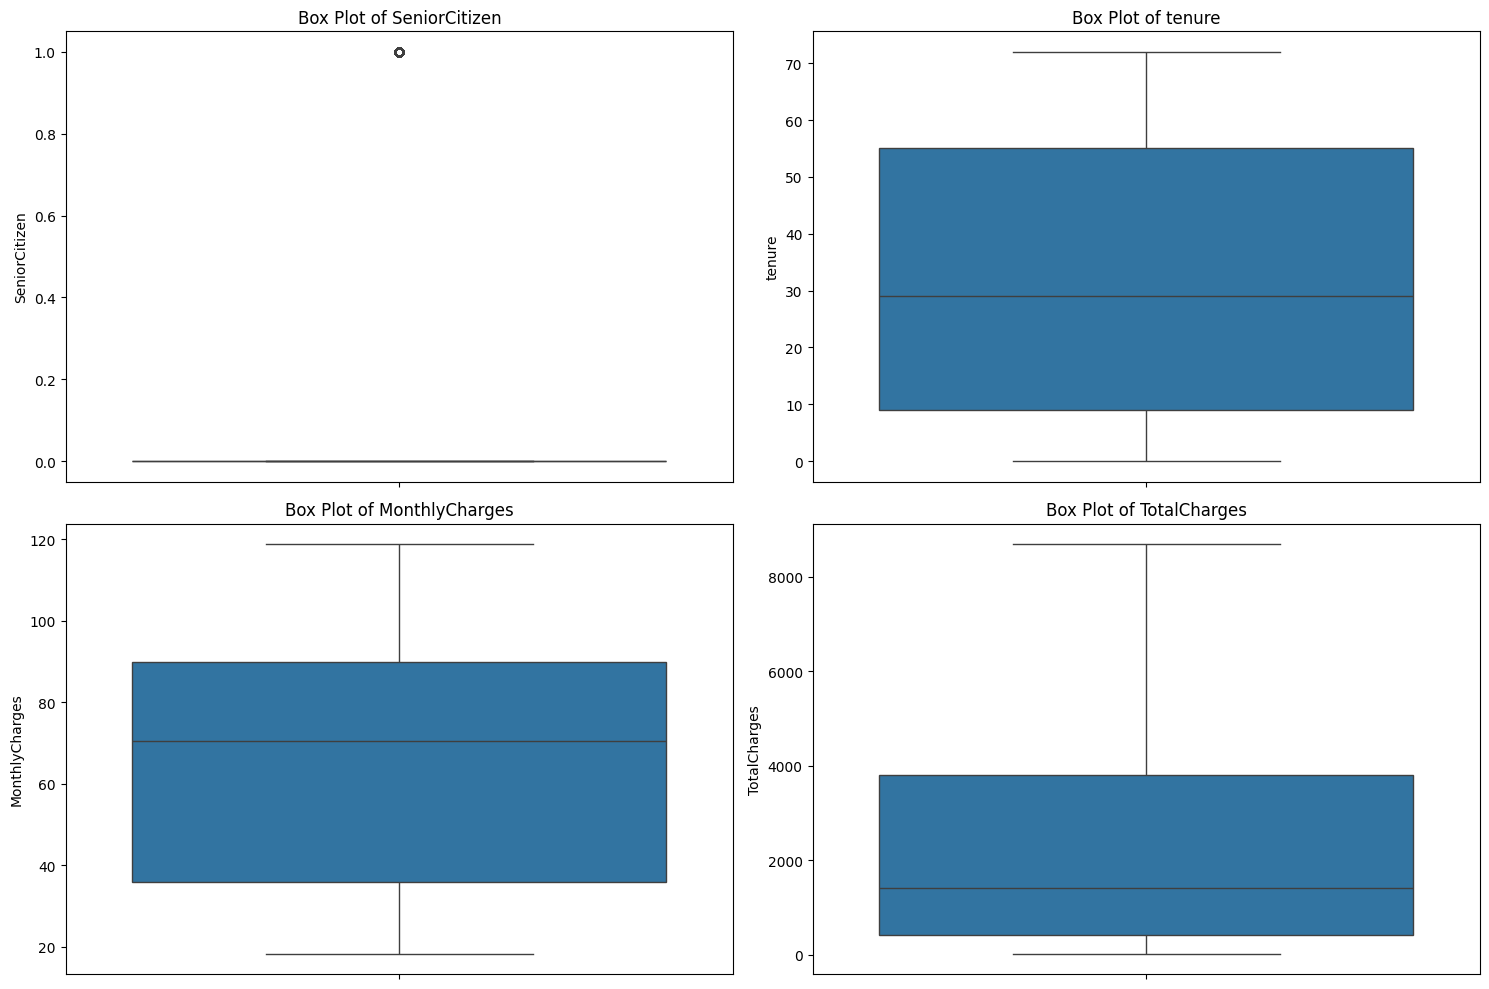

In [ ]:
# Select only numerical columns for box plots
numerical_cols = df.select_dtypes(include=np.number).columns

# Create box plots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 
 17  

In [ ]:
# Select object type columns excluding 'Churn'
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('Churn')

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

display(df_encoded.head())

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,No,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,No,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,Yes,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,No,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,Yes,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7021 non-null   int64  
 1   tenure                                 7021 non-null   int64  
 2   MonthlyCharges                         7021 non-null   float64
 3   TotalCharges                           7021 non-null   float64
 4   Churn                                  7021 non-null   object 
 5   gender_Male                            7021 non-null   bool   
 6   Partner_Yes                            7021 non-null   bool   
 7   Dependents_Yes                         7021 non-null   bool   
 8   PhoneService_Yes                       7021 non-null   bool   
 9   MultipleLines_No phone service         7021 non-null   bool   
 10  MultipleLines_Yes                      7021 non-null   bool   
 11  InternetS

In [ ]:
df.Churn.unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
# Suppose Survived is object type
print(df_encoded["Churn"].dtype)  # object
df_encoded["Churn"] = df_encoded["Churn"].map({"No": 0, "Yes": 1})
print(df_encoded["Churn"].dtype)

object
int64


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7021 non-null   int64  
 1   tenure                                 7021 non-null   int64  
 2   MonthlyCharges                         7021 non-null   float64
 3   TotalCharges                           7021 non-null   float64
 4   Churn                                  7021 non-null   int64  
 5   gender_Male                            7021 non-null   bool   
 6   Partner_Yes                            7021 non-null   bool   
 7   Dependents_Yes                         7021 non-null   bool   
 8   PhoneService_Yes                       7021 non-null   bool   
 9   MultipleLines_No phone service         7021 non-null   bool   
 10  MultipleLines_Yes                      7021 non-null   bool   
 11  InternetS

In [ ]:
corr_matrix = df_encoded.corr().abs()
upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

to_drop = [
    column for column in upper.columns if any(upper[column] > 0.95)
]
print(to_drop)

df_encoded.drop(to_drop, axis=1, inplace=True)

['MultipleLines_No phone service', 'OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'StreamingTV_No internet service', 'StreamingMovies_No internet service']


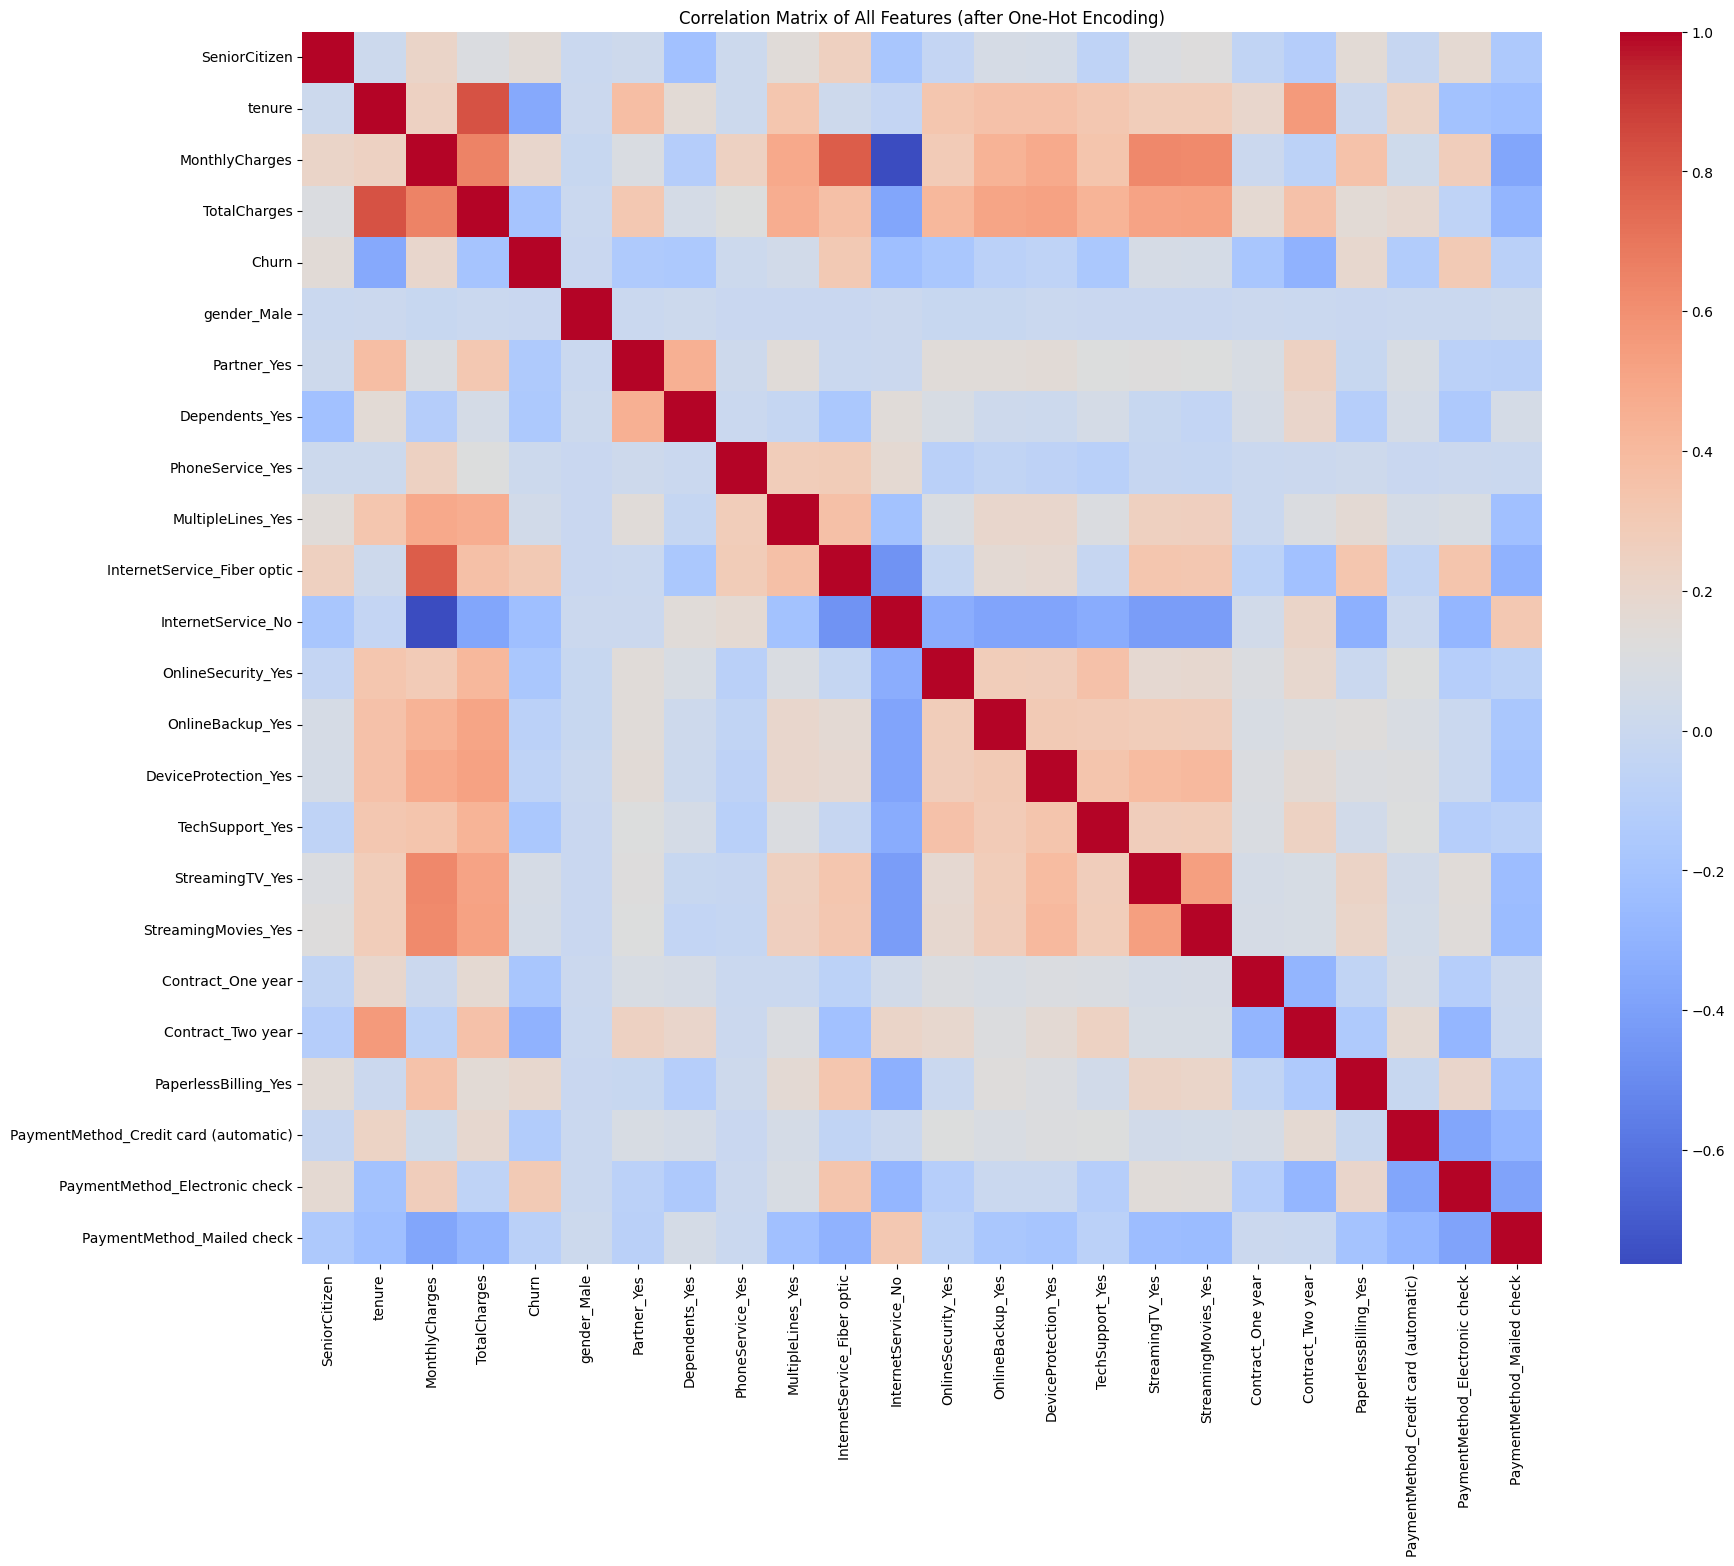

In [ ]:
# Calculate the correlation matrix for the encoded dataframe
correlation_matrix_encoded = df_encoded.corr()

# Plot the correlation heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix_encoded, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of All Features (after One-Hot Encoding)')
plt.show()

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7021 non-null   int64  
 1   tenure                                 7021 non-null   int64  
 2   MonthlyCharges                         7021 non-null   float64
 3   TotalCharges                           7021 non-null   float64
 4   Churn                                  7021 non-null   int64  
 5   gender_Male                            7021 non-null   bool   
 6   Partner_Yes                            7021 non-null   bool   
 7   Dependents_Yes                         7021 non-null   bool   
 8   PhoneService_Yes                       7021 non-null   bool   
 9   MultipleLines_Yes                      7021 non-null   bool   
 10  InternetService_Fiber optic            7021 non-null   bool   
 11  InternetS

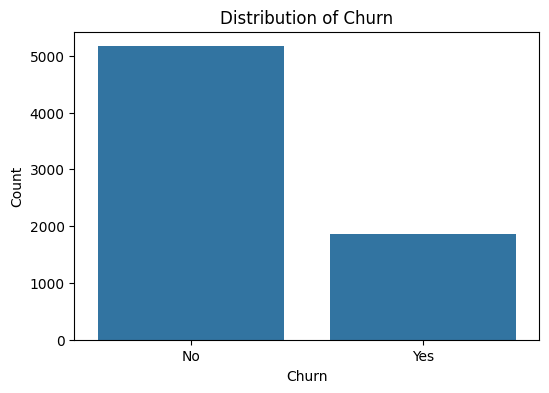

In [ ]:
# Count the occurrences of each churn value
churn_counts = df['Churn'].value_counts()

# Create a bar plot of churn distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=churn_counts.index, y=churn_counts.values)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5616, 23)
X_test shape: (1405, 23)
y_train shape: (5616,)
y_test shape: (1405,)


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Instantiate RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Resample the training data
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

print("Shape of original X_train:", X_train.shape)
print("Shape of resampled X_train:", X_train_resampled.shape)
print("Shape of original y_train:", y_train.shape)
print("Shape of resampled y_train:", y_train_resampled.shape)
print("\nDistribution of y_train_resampled:")
print(y_train_resampled.value_counts())

Shape of original X_train: (5616, 23)
Shape of resampled X_train: (2970, 23)
Shape of original y_train: (5616,)
Shape of resampled y_train: (2970,)

Distribution of y_train_resampled:
Churn
0    1485
1    1485
Name: count, dtype: int64


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the XGBoost classifier on the resampled data
model_resampled = xgb.XGBClassifier(random_state=42)
model_resampled.fit(X_train_resampled, y_train_resampled)

# Make predictions on the original test set
y_pred_resampled = model_resampled.predict(X_test)

# Evaluate the model
accuracy_resampled = accuracy_score(y_test, y_pred_resampled)
print(f"Accuracy on original test set (with undersampling): {accuracy_resampled:.4f}")

print("\nClassification Report on original test set (with undersampling):")
print(classification_report(y_test, y_pred_resampled))

print("\nConfusion Matrix on original test set (with undersampling):")
print(confusion_matrix(y_test, y_pred_resampled))

Accuracy on original test set (with undersampling): 0.7352

Classification Report on original test set (with undersampling):
              precision    recall  f1-score   support

           0       0.89      0.73      0.80      1033
           1       0.50      0.75      0.60       372

    accuracy                           0.74      1405
   macro avg       0.69      0.74      0.70      1405
weighted avg       0.79      0.74      0.75      1405


Confusion Matrix on original test set (with undersampling):
[[755 278]
 [ 94 278]]


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the XGBoost classifier
model = xgb.XGBClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7715

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1033
           1       0.58      0.47      0.52       372

    accuracy                           0.77      1405
   macro avg       0.70      0.68      0.69      1405
weighted avg       0.76      0.77      0.76      1405


Confusion Matrix:
[[908 125]
 [196 176]]


In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Instantiate RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Resample the training data
X_train_oversampled, y_train_oversampled = ros.fit_resample(X_train, y_train)

print("Shape of original X_train:", X_train.shape)
print("Shape of oversampled X_train:", X_train_oversampled.shape)
print("Shape of original y_train:", y_train.shape)
print("Shape of oversampled y_train:", y_train_oversampled.shape)
print("\nDistribution of y_train_oversampled:")
print(y_train_oversampled.value_counts())

Shape of original X_train: (5616, 23)
Shape of oversampled X_train: (8262, 23)
Shape of original y_train: (5616,)
Shape of oversampled y_train: (8262,)

Distribution of y_train_oversampled:
Churn
1    4131
0    4131
Name: count, dtype: int64


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the XGBoost classifier on the oversampled data
model_oversampled = xgb.XGBClassifier(random_state=42)
model_oversampled.fit(X_train_oversampled, y_train_oversampled)

# Make predictions on the original test set
y_pred_oversampled = model_oversampled.predict(X_test)

# Evaluate the model
accuracy_oversampled = accuracy_score(y_test, y_pred_oversampled)
print(f"Accuracy on original test set (with oversampling): {accuracy_oversampled:.4f}")

print("\nClassification Report on original test set (with oversampling):")
print(classification_report(y_test, y_pred_oversampled))

print("\nConfusion Matrix on original test set (with oversampling):")
print(confusion_matrix(y_test, y_pred_oversampled))

Accuracy on original test set (with oversampling): 0.7644

Classification Report on original test set (with oversampling):
              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1033
           1       0.55      0.63      0.59       372

    accuracy                           0.76      1405
   macro avg       0.70      0.72      0.71      1405
weighted avg       0.78      0.76      0.77      1405


Confusion Matrix on original test set (with oversampling):
[[839 194]
 [137 235]]
